In [1]:
import pandas as pd 
import hvplot.pandas

In [2]:
sleep_remote_df=pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

sleep_remote_df


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [3]:
print(sleep_remote_df.info())
print(sleep_remote_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [4]:
# Drop rows with missing values in critical columns
sleep_remote_df.dropna(subset=['Sleep_Quality', 'Work_Location', 'Region'], inplace=True)
sleep_remote_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the Sleep_Quality and Work_Location
sleep_remote_df['Sleep_Quality'] = label_encoder.fit_transform(sleep_remote_df['Sleep_Quality'])
sleep_remote_df['Work_Location'] = label_encoder.fit_transform(sleep_remote_df['Work_Location'])
sleep_remote_df['Satisfaction_with_Remote_Work'] = label_encoder.fit_transform(sleep_remote_df['Satisfaction_with_Remote_Work'])
sleep_remote_df['Region'] = label_encoder.fit_transform(sleep_remote_df['Region'])
sleep_remote_df['Stress_Level'] = label_encoder.fit_transform(sleep_remote_df['Stress_Level'])
sleep_remote_df['Access_to_Mental_Health_Resources'] = label_encoder.fit_transform(sleep_remote_df['Access_to_Mental_Health_Resources'])


print(sleep_remote_df)


     Employee_ID  Age      Gender           Job_Role    Industry  \
0        EMP0001   32  Non-binary                 HR  Healthcare   
1        EMP0002   40      Female     Data Scientist          IT   
2        EMP0003   59  Non-binary  Software Engineer   Education   
3        EMP0004   27        Male  Software Engineer     Finance   
4        EMP0005   49        Male              Sales  Consulting   
...          ...  ...         ...                ...         ...   
4995     EMP4996   32        Male              Sales  Consulting   
4996     EMP4997   39      Female              Sales  Healthcare   
4997     EMP4998   42      Female              Sales  Healthcare   
4998     EMP4999   27      Female              Sales  Healthcare   
4999     EMP5000   29        Male                 HR          IT   

      Years_of_Experience  Work_Location  Hours_Worked_Per_Week  \
0                      13              0                     47   
1                       3              2         

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
features = sleep_remote_df.drop(columns=['Stress_Level','Sleep_Quality','Age','Mental_Health_Condition',
                                         'Productivity_Change','Employee_ID','Industry','Gender','Job_Role',
                                         'Years_of_Experience','Physical_Activity','Access_to_Mental_Health_Resources','Satisfaction_with_Remote_Work',
                                        'Region'])


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_data = scaler.fit_transform(features)


In [8]:
from sklearn.cluster import KMeans
optimal_k = 3  # Based on the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_data)

In [9]:
# Add the cluster labels to the original DataFrame
sleep_remote_df['Cluster'] = clusters


In [10]:
# Analyze clusters
cluster_analysis = sleep_remote_df.groupby('Cluster')['Sleep_Quality'].value_counts(normalize=True).unstack()
print(cluster_analysis)

Sleep_Quality         0         1         2
Cluster                                    
0              0.324407  0.333536  0.342057
1              0.338218  0.334115  0.327667
2              0.313749  0.344640  0.341611


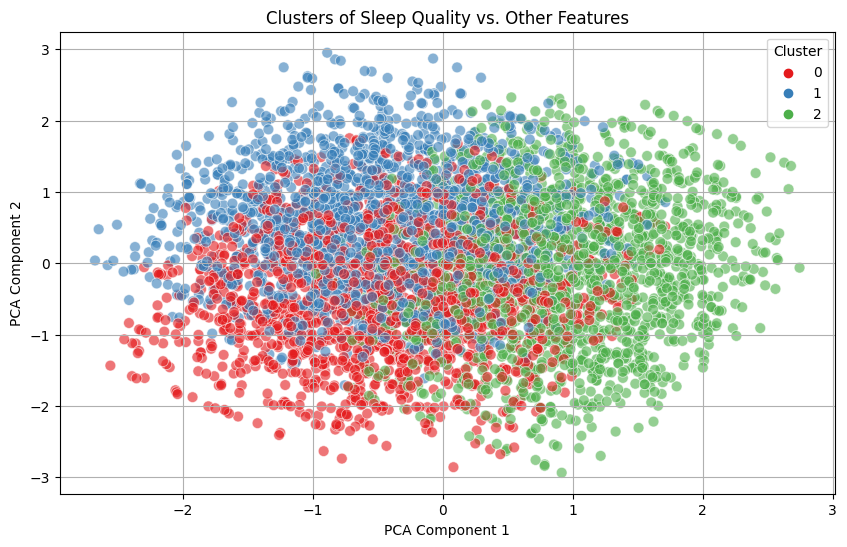

In [12]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60, alpha=0.6)
plt.title('Clusters of Sleep Quality vs. Other Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.savefig("sleep_unsupervised.png")
plt.grid()
plt.show()



In [ ]:

Suggested Explanation:

# #The PCA plot reveals three distinct but closely related clusters, suggesting a progression of sleep quality and 
# work location characteristics rather than strictly isolated groups. The topmost blue cluster might represent a group 
# experiencing better sleep quality, potentially linked to remote work, while the red cluster below may reflect slightly lower
# sleep quality associated with on-site work. The green cluster, positioned to the right, likely captures individuals with unique
# characteristics, possibly hybrid workers or those affected by different work-related factors. This arrangement implies that work 
# location has a gradual and variable impact on sleep quality, with certain work setups potentially promoting slightly better sleep outcomes."


Overlap Might Indicate Continuity: Rather than representing entirely distinct groups, clusters that are close together might represent a continuum or spectrum. For instance:

People who work remotely, on-site, or hybrid could show similar sleep quality patterns, meaning the work location alone doesn’t lead to dramatic differences in sleep quality.
This could imply that other factors, not captured by the current PCA components, might play a stronger role in determining sleep quality.

Subtle Differences Between Clusters: The close proximity of clusters in the PCA space suggests that the differences in sleep quality based on work location are not dramatic. This could mean that, while there is some grouping based on work location and sleep quality, these factors don't drastically distinguish one cluster from another. Instead, the differences are likely more nuanced.

Overlap Might Indicate Continuity: Rather than representing entirely distinct groups, clusters that are close together might represent a continuum or spectrum. For instance:

People who work remotely, on-site, or hybrid could show similar sleep quality patterns, meaning the work location alone doesn’t lead to dramatic differences in sleep quality.
This could imply that other factors, not captured by the current PCA components, might play a stronger role in determining sleep quality.
Additional Analysis with Work Location as a Separate Variable:

Distribution Analysis: You could check the proportion of different work locations (e.g., remote, on-site, hybrid) within each cluster. This could reveal if certain work locations are still somewhat more common in specific clusters.
Statistical Testing: If the clusters are not visually distinct, you could still perform statistical tests (e.g., ANOVA or chi-square tests) to see if the differences in sleep quality between work locations are significant. This could reveal meaningful differences even if they aren’t visually apparent in the PCA plot.
Explaining the Results: Here’s how you might phrase your findings:

"The clustering analysis reveals that while there are groupings based on sleep quality and work location, the clusters are positioned close to each other in PCA space. This suggests that, while work location might influence sleep quality, it does so subtly, without forming starkly distinct groups. Factors beyond work location may play a significant role in sleep quality, or the impact of work location on sleep is continuous rather than categorical. Further analysis, such as examining additional features or conducting statistical testing, could provide deeper insights."

Alternative Visualization: Sometimes, clusters that look close in a 2D PCA plot may separate better in other visualizations, like 3D PCA or t-SNE plots, which can better capture subtle separations.

Let me know if you'd like help on pecific visualizations or statistical analyses to further interpret these clusters!






